In [128]:
#Setup
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle
import pandas as pd
plt.rcParams["figure.figsize"] = (20,10)

In [129]:
data = open('higgs_100000_pt_250_500.pkl','rb')
new_dict = pickle.load(data)
data2 = open('qcd_100000_pt_250_500.pkl','rb')
qcd_dict = pickle.load(data2)

In [130]:
#Random Samples using expected number of events for a given run
state = 123
higgs_events = new_dict.sample(n=100, random_state = state)
qcd_events = qcd_dict.sample(n=20000, random_state = state)

In [131]:
#Making lists of labels
higgs_labels = ['higgs']*100
qcd_labels = ['qcd']*20000

In [132]:
#Labeling and combining sampled data
higgs_events['label'] = higgs_labels
qcd_events['label'] = qcd_labels
sample = pd.concat([higgs_events,qcd_events])

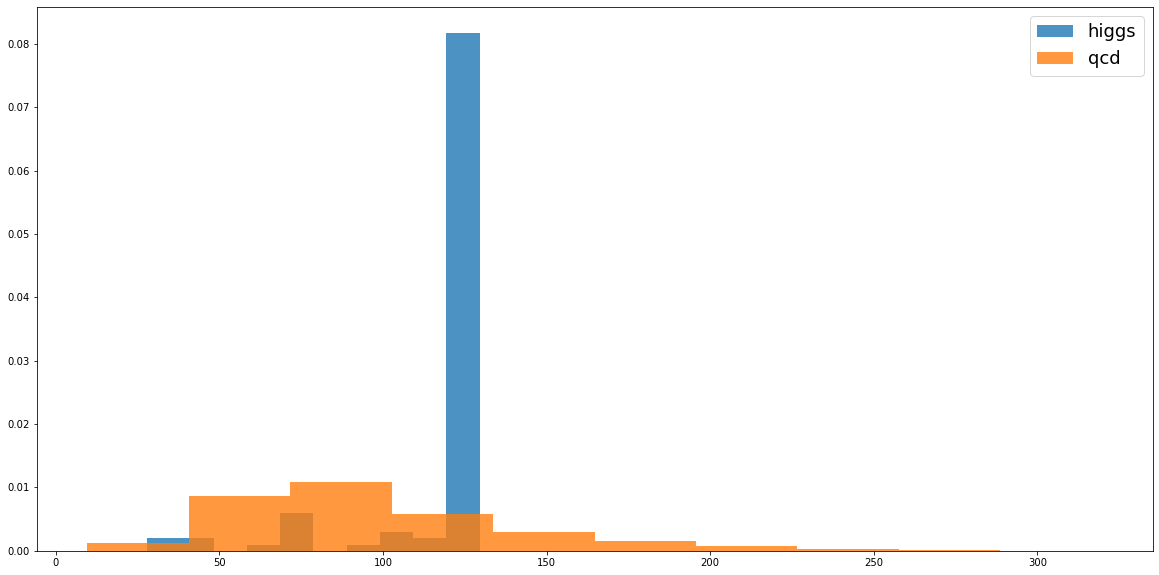

In [133]:
fig, ax = plt.subplots(1,1)
ax.hist(higgs_events['mass'],density = True,alpha = 0.8, label = 'higgs')
ax.hist(qcd_events['mass'],density = True,alpha = 0.8, label = 'qcd')
plt.legend(fontsize = 18)
plt.show()

Expected events in background is 20,000 and is poisson distirbuted

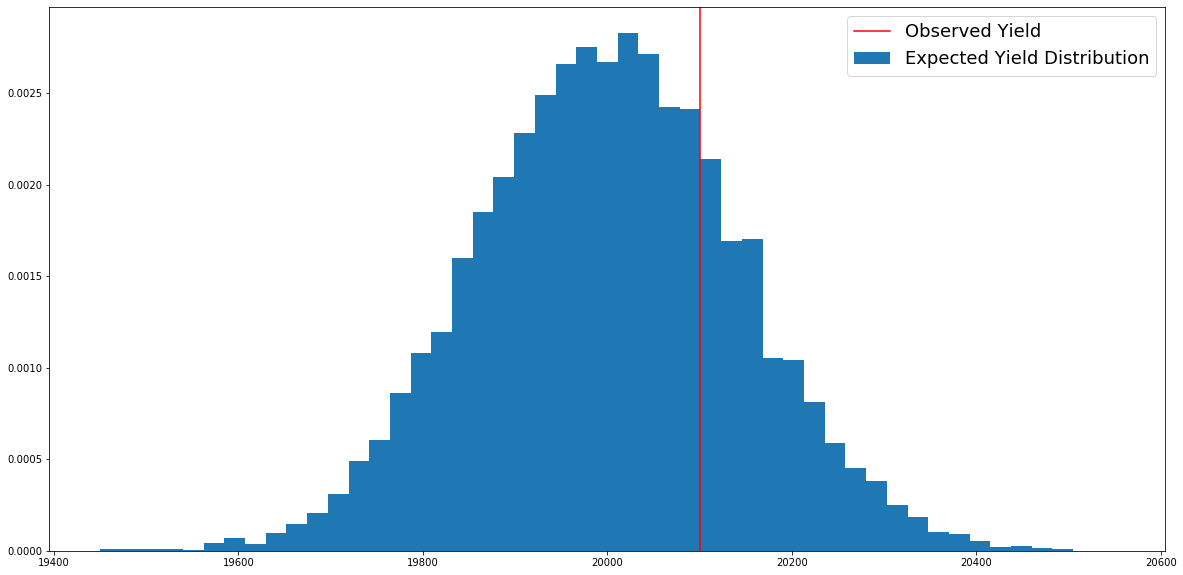

In [134]:
np.random.seed(123)
dist = stats.poisson.rvs(20000, size = 10000)
plt.hist(dist,density = True, bins = np.linspace(19450,20550,50), label = 'Expected Yield Distribution')
plt.axvline(20100,color = 'red',label = 'Observed Yield')
plt.legend(fontsize = 18)
plt.show()

In [135]:
print('Significance of 20100 events:', np.round(stats.norm.isf(stats.poisson.sf(20100,20000)),3),'sigma')

Significance of 20100 events: 0.711 sigma


$\frac{\textbf{N}_{Higgs}}{\sqrt{\textbf{N}_{QCD}}} = \frac{100}{\sqrt{20000}} = 0.707$

This value is different than the value obtained in the previous calculation. This is because the value $\frac{\textbf{N}_{Higgs}}{\sqrt{\textbf{N}_{QCD}}}$ is the number of standard deviations away from the mean the measurment is, while the number from the above calculation is how the probability of the background producing a value larger than the observed value corresponds to the standard normal distributions $\sigma$.

In [136]:
def mass_cut(qcd_events,higgs_events,low,high):
    a = np.array(qcd_events['mass'])
    b = np.array(higgs_events['mass'])
    mu = sum(a[low<a]<high)
    signal = sum(b[low<b]<high)
    sig = np.round(stats.norm.isf(stats.poisson.sf(mu + signal,mu)),3)
    print('Mass cut [',low,high ,'] leaves',mu,'expected qcd events and',signal,'expected higgs events')
    print('Significance of', mu+signal ,'events:',sig,'sigma')
    print('---------------------------------------------\n')

In [137]:
s = 110
for n in range(0,18):
    mass_cut(qcd_events,higgs_events,s,135)
    s+=1

Mass cut [ 110 135 ] leaves 2655 expected qcd events and 85 expected higgs events
Significance of 2740 events: 1.654 sigma
---------------------------------------------

Mass cut [ 111 135 ] leaves 2512 expected qcd events and 85 expected higgs events
Significance of 2597 events: 1.7 sigma
---------------------------------------------

Mass cut [ 112 135 ] leaves 2396 expected qcd events and 85 expected higgs events
Significance of 2481 events: 1.74 sigma
---------------------------------------------

Mass cut [ 113 135 ] leaves 2261 expected qcd events and 85 expected higgs events
Significance of 2346 events: 1.79 sigma
---------------------------------------------

Mass cut [ 114 135 ] leaves 2119 expected qcd events and 85 expected higgs events
Significance of 2204 events: 1.849 sigma
---------------------------------------------

Mass cut [ 115 135 ] leaves 1990 expected qcd events and 85 expected higgs events
Significance of 2075 events: 1.907 sigma
-------------------------------

The upper bound cut of 135 was chosen because there are very little higgs events in the total set of data with mass values greater than that. The lower bound was then increased by 1 from 110 until the significance began to fall off. This gave an optimal cutoff of between 124 and 135 giving a significance of $2.303\sigma$

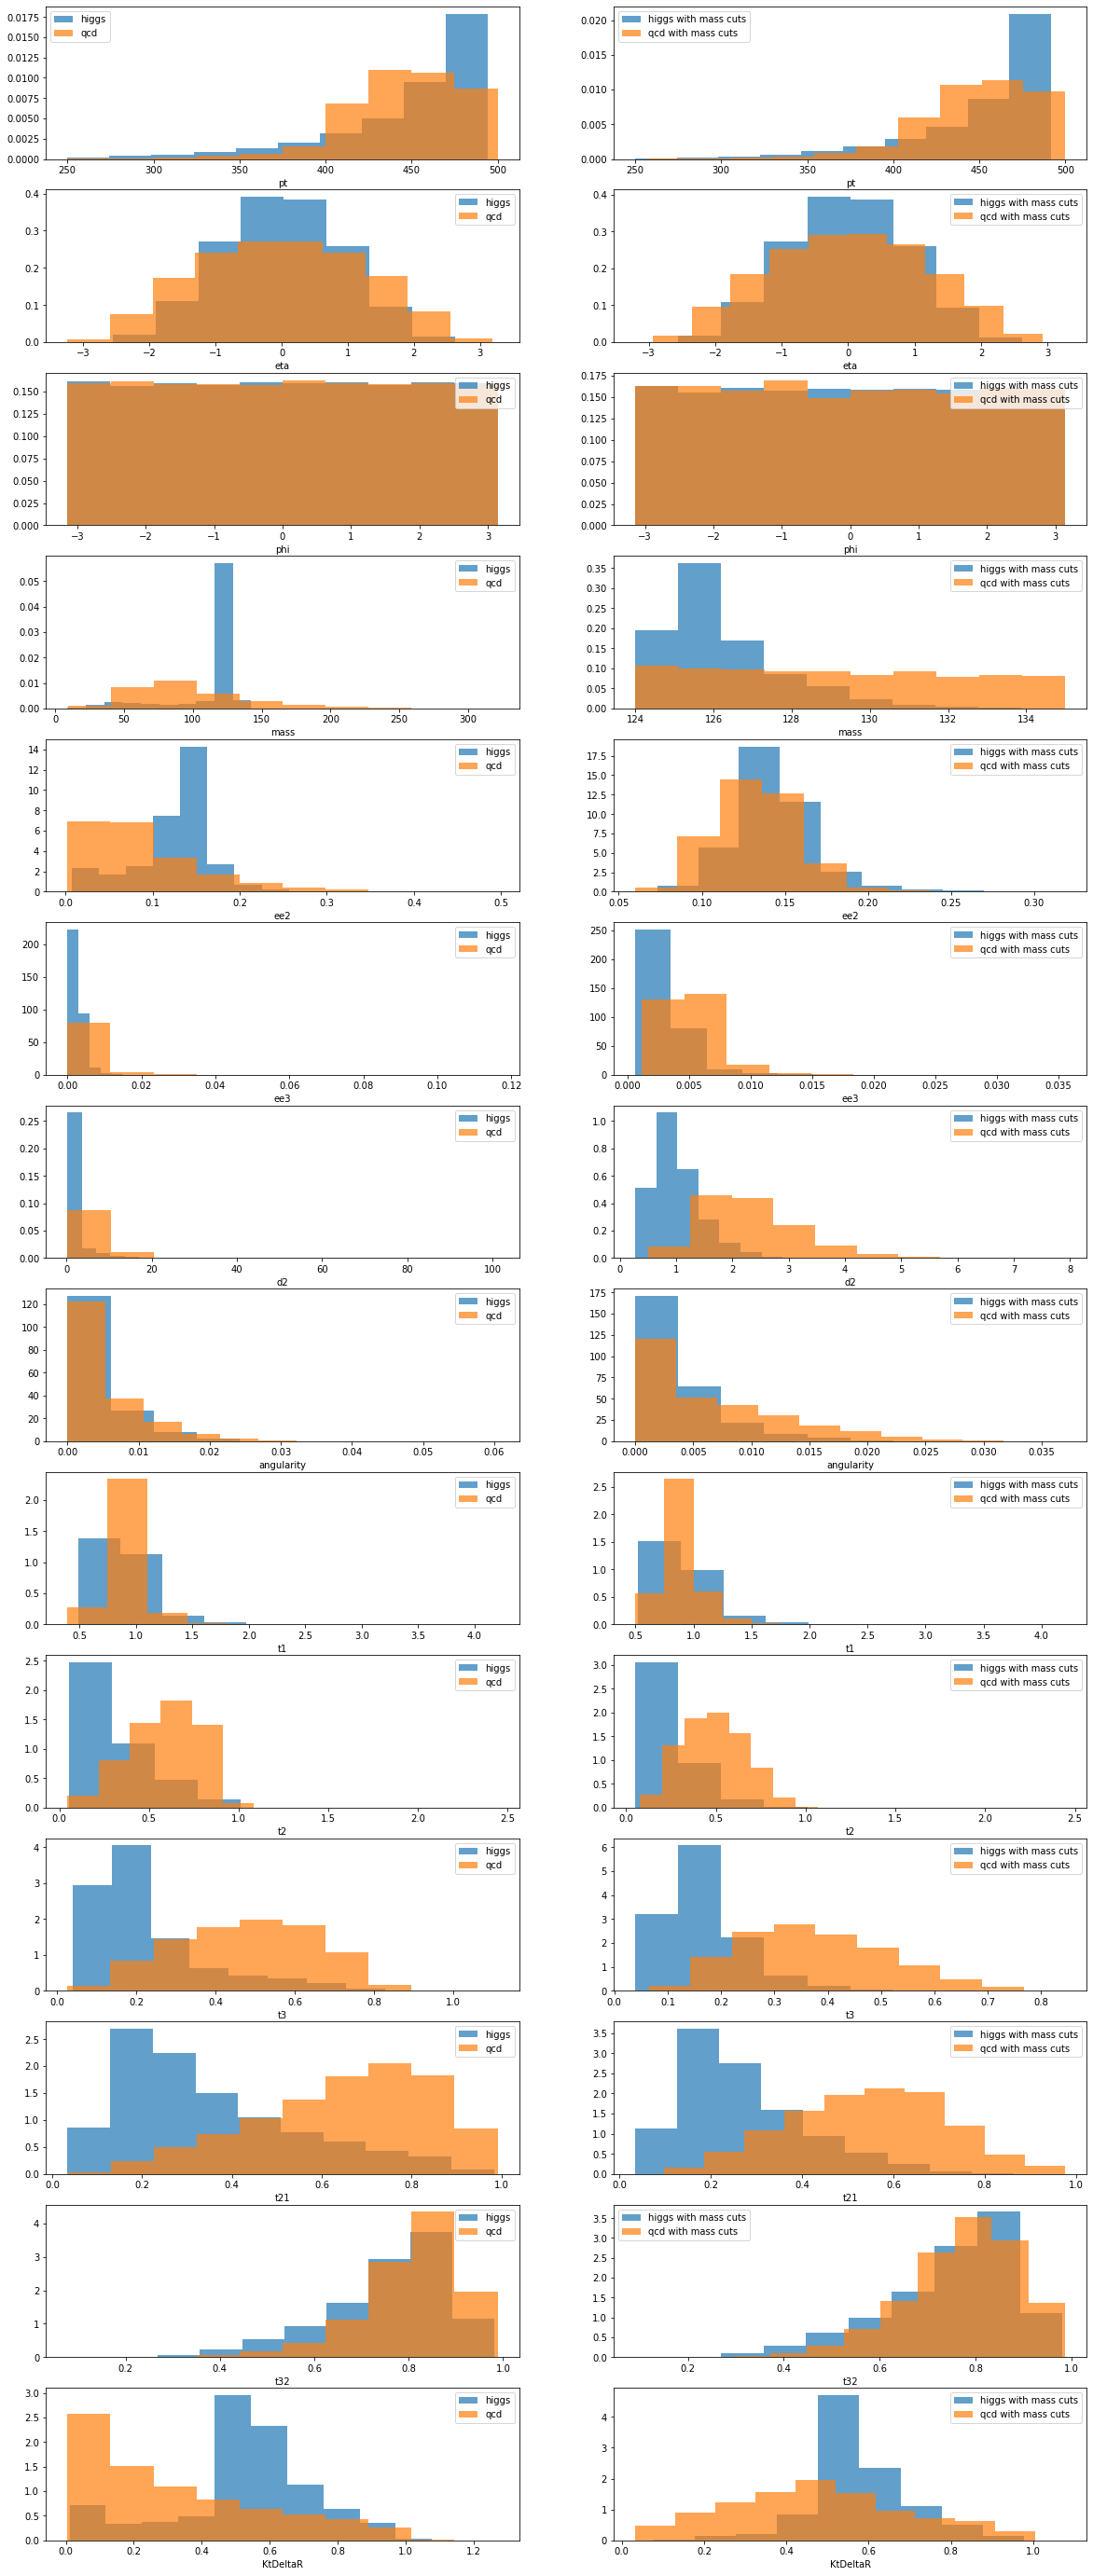

In [158]:
plt.rcParams["figure.figsize"] = (20,50)
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12),(ax13,ax14),(ax15,ax16),(ax17,ax18),(ax19,ax20),(ax21,ax22),(ax23,ax24),(ax25,ax26),(ax27,ax28)) = plt.subplots(14,2)
axes = ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12),(ax13,ax14),(ax15,ax16),(ax17,ax18),(ax19,ax20),(ax21,ax22),(ax23,ax24),(ax25,ax26),(ax27,ax28))
labels = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
a = np.array(new_dict['mass'])
b = np.array(qcd_dict['mass'])
for i in range(0,14):
    axes[i][0].hist(new_dict[labels[i]],density = True, alpha = 0.7,label = 'higgs')
    axes[i][0].hist(qcd_dict[labels[i]],density = True, alpha = 0.7,label = 'qcd')
    axes[i][0].set_xlabel(labels[i])
    axes[i][0].legend()
    axes[i][1].hist(new_dict[labels[i]][np.logical_and(a<135, a>124)],density = True, alpha = 0.7,label = 'higgs with mass cuts')
    axes[i][1].hist(qcd_dict[labels[i]][np.logical_and(b<135, b>124)],density = True, alpha = 0.7,label = 'qcd with mass cuts')
    axes[i][1].set_xlabel(labels[i])
    axes[i][1].legend()
plt.show()

In [168]:
def feature_cut(qcd_events,higgs_events,feature,low,high):
    a = np.array(qcd_events[feature])
    b = np.array(higgs_events[feature])
    mu = sum(a[low<a]<high)
    signal = sum(b[low<b]<high)
    sig = np.round(stats.norm.isf(stats.poisson.sf(mu + signal,mu)),3)
    print(feature,'cut [',low,high ,'] leaves',mu,'expected qcd events and',signal,'expected higgs events')
    print('Significance of', mu+signal ,'events:',sig,'sigma')
    print('---------------------------------------------\n')

In [200]:
feature_cut(qcd_events,higgs_events,'d2',0,1.42)

d2 cut [ 0 1.42 ] leaves 1995 expected qcd events and 68 expected higgs events
Significance of 2063 events: 1.529 sigma
---------------------------------------------



In [186]:
feature_cut(qcd_events,higgs_events,'t3',0,0.17)
feature_cut(qcd_events,higgs_events,'KtDeltaR',0.48,0.93)
feature_cut(qcd_events,higgs_events,'ee2',0.11,0.21)
feature_cut(qcd_events,higgs_events,'d2',0,1.42)

t3 cut [ 0 0.17 ] leaves 711 expected qcd events and 50 expected higgs events
Significance of 761 events: 1.878 sigma
---------------------------------------------

KtDeltaR cut [ 0.48 0.93 ] leaves 4744 expected qcd events and 81 expected higgs events
Significance of 4825 events: 1.182 sigma
---------------------------------------------

ee2 cut [ 0.11 0.21 ] leaves 4359 expected qcd events and 76 expected higgs events
Significance of 4435 events: 1.158 sigma
---------------------------------------------



In [214]:
a = np.array(qcd_events['mass'])
b = np.array(higgs_events['mass'])
feature_cut(qcd_events[np.logical_and(a<135, a>124)],higgs_events[np.logical_and(b<135, b>124)],'t3',0,0.17)
feature_cut(qcd_events[np.logical_and(a<135, a>124)],higgs_events[np.logical_and(b<135, b>124)],'KtDeltaR',0.48,0.93)
feature_cut(qcd_events[np.logical_and(a<135, a>124)],higgs_events[np.logical_and(b<135, b>124)],'ee2',0.11,0.21)
feature_cut(qcd_events[np.logical_and(a<135, a>124)],higgs_events[np.logical_and(b<135, b>124)],'d2',0,1.42)

t3 cut [ 0 0.17 ] leaves 42 expected qcd events and 44 expected higgs events
Significance of 86 events: 6.022 sigma
---------------------------------------------

KtDeltaR cut [ 0.48 0.93 ] leaves 431 expected qcd events and 68 expected higgs events
Significance of 499 events: 3.225 sigma
---------------------------------------------

ee2 cut [ 0.11 0.21 ] leaves 776 expected qcd events and 68 expected higgs events
Significance of 844 events: 2.43 sigma
---------------------------------------------

d2 cut [ 0 1.42 ] leaves 102 expected qcd events and 62 expected higgs events
Significance of 164 events: 5.693 sigma
---------------------------------------------



In [257]:
def mult_cut(qcd,higgs,features,cuts):
    '''
    Parameters:
        qcd - qcd data dictionary
        higgs - higgs data dictionary
        features (list) - the features to apply cuts to
        cuts (list of touples) - in format ((min,max),(min,max)) 
    Returns:
        number of qcd and higgs events
        cut min and max
        significance
    '''
    mu = qcd
    signal = higgs
    for i in range(0,len(features)):
        a = np.array(mu[features[i]])
        b = np.array(signal[features[i]])
        mu = mu[:][np.logical_and(a>cuts[i][0], a<cuts[i][1])]
        signal = signal[:][np.logical_and(b>cuts[i][0], b<cuts[i][1])]
    mu = len(mu)
    signal = len(signal)
    sig = np.round(stats.norm.isf(stats.poisson.sf(mu + signal,mu)),3)
    #print(features,'cuts', cuts ,'leaves',mu,'expected qcd events and',signal,'expected higgs events')
    #print('Significance of', mu+signal ,'events:',sig,'sigma')
    #print('---------------------------------------------\n')
    return(1/sig)

In [256]:
mult_cut(qcd_events,higgs_events,['mass','d2','KtDeltaR'],[(124,135),(0,1.42),(0.48,0.93)])

['mass', 'd2', 'KtDeltaR'] cuts [(124, 135), (0, 1.42), (0.48, 0.93)] leaves 63 expected qcd events and 58 expected higgs events
Significance of 121 events: 6.545 sigma
---------------------------------------------



0.15278838808250572